In [101]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import seaborn as sns

In [102]:
dir = "C:\\Users\\chloe\\wolkovich_s24\\TreeRings\\code\\focus_testng\\different_cookie"
images = []
rows = 15
cols = 16

image_filenames = os.listdir("{}".format(dir))

In [103]:
def compute_variance(image):
    # adapted from macro info at https://imagejdocu.list.lu/macro/normalized_variance
    #cast 0 as NAN
    mask_nan=image.astype('float')
    mask_nan[mask_nan==0]=np.nan

    mean = np.nanmean(mask_nan)
    width, height = mask_nan.shape
    square_diff = (mask_nan - mean) **2
    b = np.nansum(square_diff)

    # Compute normVar, handling NaN values
    if b == 0.0:
        normVar = np.nan
    else:
        normVar = b / (height * width * mean)
    return normVar

In [139]:
def hsl_mask(img, sat_min, sat_max):
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


    s_channel = imgHSV[:,:,1]
    lower = np.array([172, 76, 76])
    upper = np.array([177, 238, 200])
    mask = cv2.inRange(s_channel, sat_min, sat_max)
    # mask = cv2.inRange(imgHSV, np.array([0,250,0]), np.array([255,255,255]))
    res =cv2.bitwise_and(img, img, mask=mask)
    return res

In [123]:
def is_background(image):
    mask_nan=image.astype('float')
    mask_nan[mask_nan==0]=np.nan

    if np.count_nonzero(np.isnan(mask_nan)) > (mask_nan.size * 0.25):
        return True
    return False

In [106]:
for image_name in image_filenames:
    image_path = os.path.join(dir, image_name)
    image = cv2.imread(image_path)
    masked = hsl_mask(image)
    var = compute_variance(cv2.cvtColor(masked, cv2.COLOR_RGB2GRAY))
    is_bg = is_background(masked)
    print("image: {} variance: {} background: {}".format(image_name, var, is_bg))

image: focused_0_0.tiff variance: nan background: True
image: focused_0_1.tiff variance: nan background: True
image: focused_0_10.tiff variance: 0.0029304689680909337 background: True
image: focused_0_11.tiff variance: 0.000566492885340518 background: True
image: focused_0_12.tiff variance: 0.01978269045822004 background: True
image: focused_0_13.tiff variance: 0.014209714190802313 background: True
image: focused_0_14.tiff variance: 0.0037989509279901085 background: True
image: focused_0_15.tiff variance: 6.965535821172857e-05 background: True


C:\Users\chloe\AppData\Local\Temp\ipykernel_26928\2584309658.py:7: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(mask_nan)


image: focused_0_2.tiff variance: nan background: True
image: focused_0_3.tiff variance: nan background: True
image: focused_0_4.tiff variance: 1.2510904446462557e-05 background: True
image: focused_0_5.tiff variance: 0.005543973875919526 background: True
image: focused_0_6.tiff variance: 1.9740912594808508 background: True
image: focused_0_7.tiff variance: 6.945882431308006 background: False
image: focused_0_8.tiff variance: 4.554876563241428 background: False
image: focused_0_9.tiff variance: 1.664020557865528 background: True
image: focused_10_0.tiff variance: 0.31074434777046417 background: False
image: focused_10_1.tiff variance: 9.749514699778363 background: False
image: focused_10_10.tiff variance: 1.3581422081779961 background: False
image: focused_10_11.tiff variance: 1.4318679476263578 background: False
image: focused_10_12.tiff variance: 1.6411574809162484 background: False
image: focused_10_13.tiff variance: 1.8189974893492553 background: False
image: focused_10_14.tiff var

KeyboardInterrupt: 

177
172
238
76
121.99998529128563


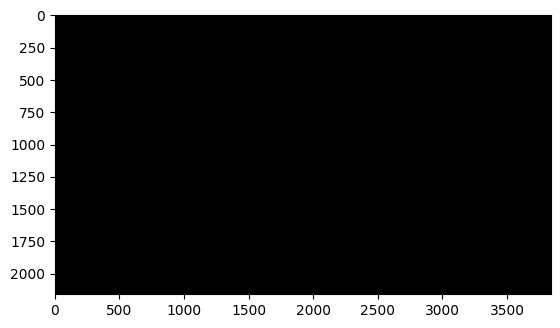

In [ ]:
image = cv2.imread("{}\\focused_0_0.tiff".format(dir))
masked = hsl_mask(image)
plt.imshow(masked)

image_hsl = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

h_channel = image_hsl[:,:,0]
s_channel = image_hsl[:,:,1]
v_channel = image_hsl[:,:,2]

print(h_channel.max())
print(h_channel.min())
print(s_channel.max())
print(s_channel.min())
var = compute_variance(cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY))
# np.count_nonzero(np.isnan(mask_nan))

# plt.imshow(mask_nan)
print(var)


173
0
69
0
255
99


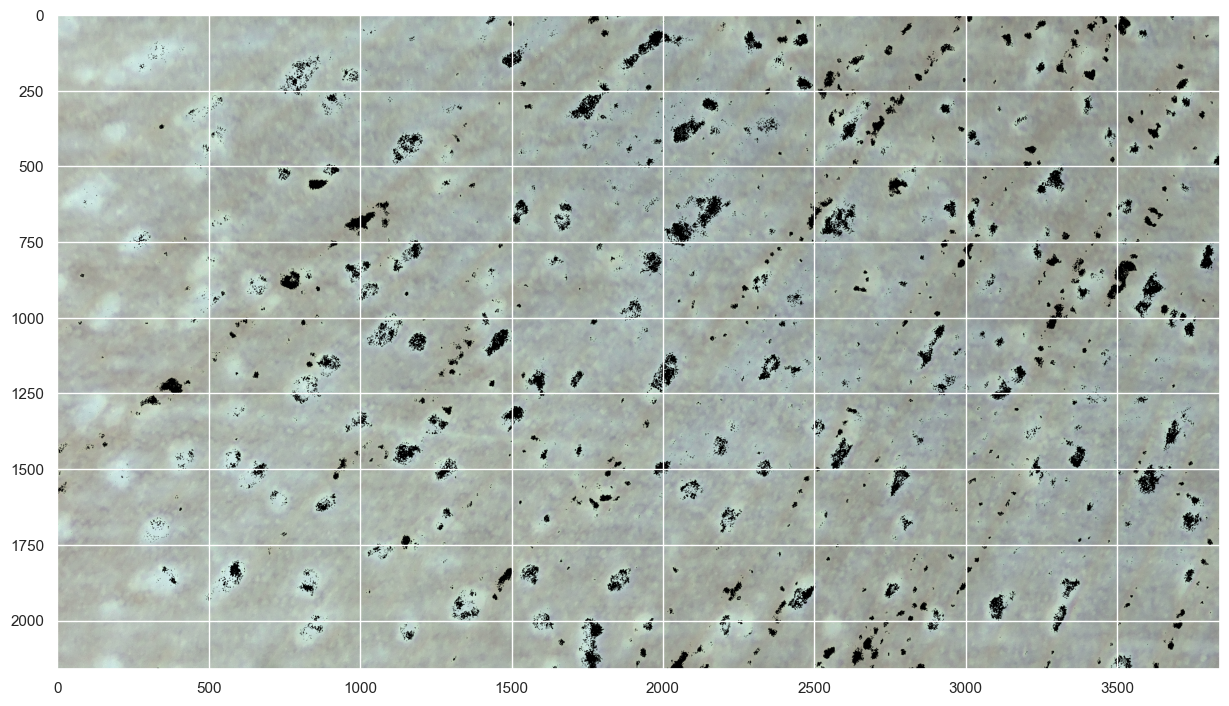

In [165]:
image = cv2.imread(".\\hsl_testing\\focused_13_6.tiff")
masked_bg = hsl_mask(image, 0, 76)
masked_cookie = hsl_mask(image, 0, 30)
#plt.imshow(cv2.cvtColor(masked_bg, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(masked_cookie, cv2.COLOR_BGR2RGB))

image_hsl= cv2.cvtColor(masked_bg, cv2.COLOR_BGR2HSV)



h_channel = image_hsl[:,:,0]
s_channel = image_hsl[:,:,1]
v_channel = image_hsl[:,:,2]

print(h_channel.max())
print(h_channel.min())
print(s_channel.max())
print(s_channel.min())
print(v_channel.max())
print(v_channel.min())
var = compute_variance(cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY))
# np.count_nonzero(np.isnan(mask_nan))



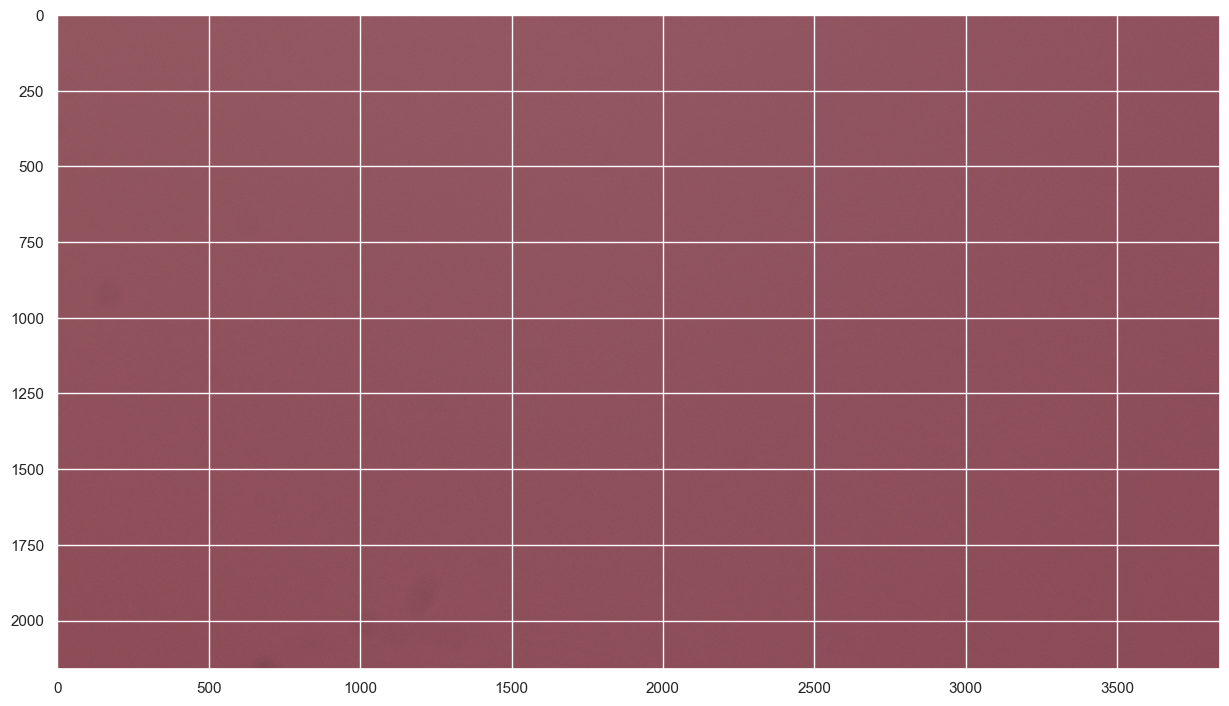

In [175]:
image = cv2.imread("{}\\focused_0_0.tiff".format(dir))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

blurred = cv2.GaussianBlur(image, (1111,1111), 0)
# print(image.shape)
# plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))

In [177]:
image_hsl = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)


h_channel = image_hsl[:,:,0]
s_channel = image_hsl[:,:,1]
v_channel = image_hsl[:,:,2]

print(h_channel.max())
print(h_channel.min())
print(s_channel.max())
print(s_channel.min())
print(v_channel.max())
print(v_channel.min())

176
174
117
103
147
139


In [117]:
def compute_laplacian(image):

    # odd numbers only, can be tuned
    kernel_size = 11         # Size of the laplacian window
    blur_size = 9           # How big of a kernel to use for the gaussian blur
    mask_nan=image.astype('float')
    mask_nan[mask_nan==0]=np.nan
    blurred = cv2.GaussianBlur(mask_nan, (blur_size,blur_size), 0)
    return cv2.Laplacian(blurred, cv2.CV_64F, ksize=kernel_size) 

In [178]:
variance_matrix =[]
lap_matrix =[]
bg_matrix = []
dir = ".\\different_cookie"
x=15
y=16
for x in range(rows):
    row_matrix = []
    row_bg = []
    row_lap = []
    for y in range(cols):
        image = cv2.imread("{}\\focused_{}_{}.tiff".format(dir, x, y))
        masked_image = hsl_mask(image, 0, 27)

        grayscale_image = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)
        variance = compute_variance(grayscale_image)
        row_matrix.append(variance)
        if is_background(masked_image):
            row_bg.append(1)
        else:
            row_bg.append(0)
    variance_matrix.append(row_matrix)
    bg_matrix.append(row_bg)

C:\Users\chloe\AppData\Local\Temp\ipykernel_26928\2584309658.py:7: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(mask_nan)


<Axes: >

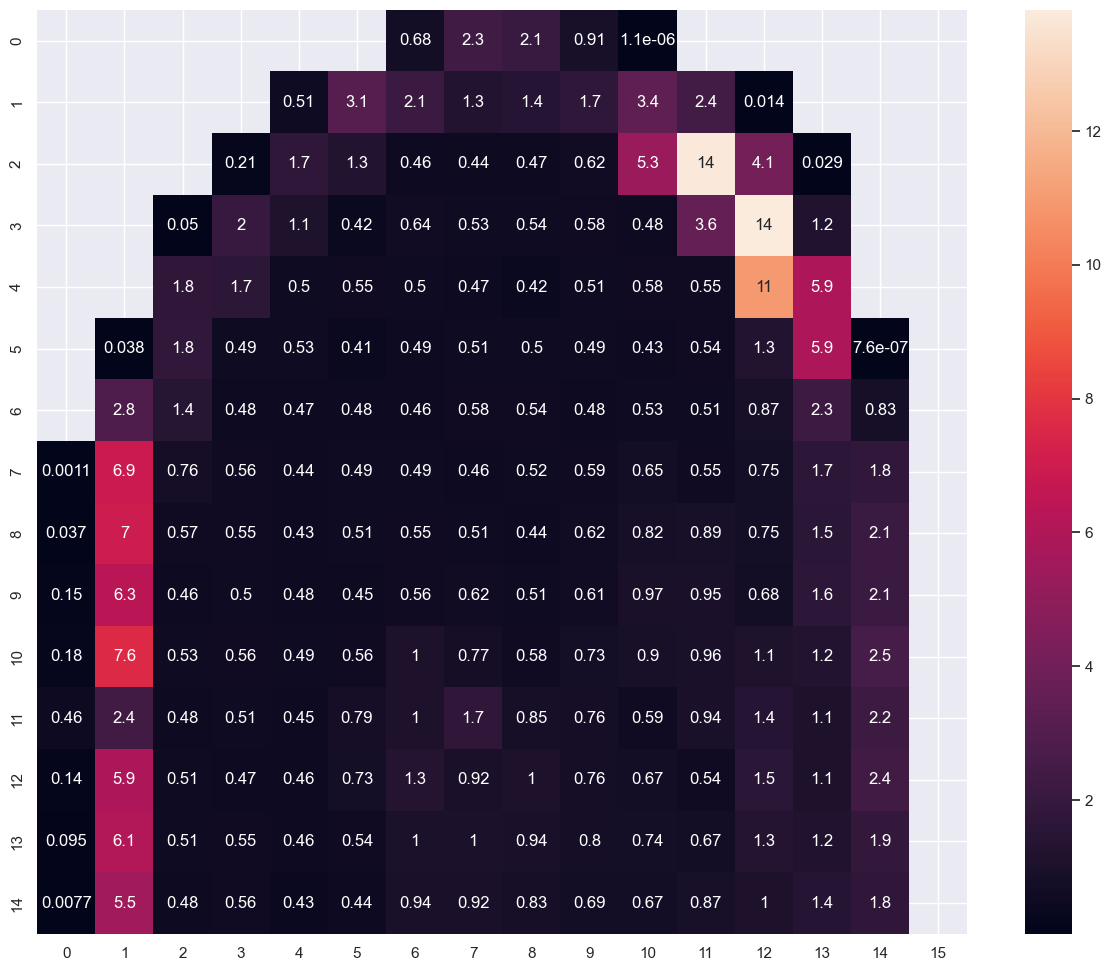

In [168]:
sns.set_theme(rc={'figure.figsize':(15,12)})
sns.heatmap(variance_matrix, annot=True)

<Axes: >

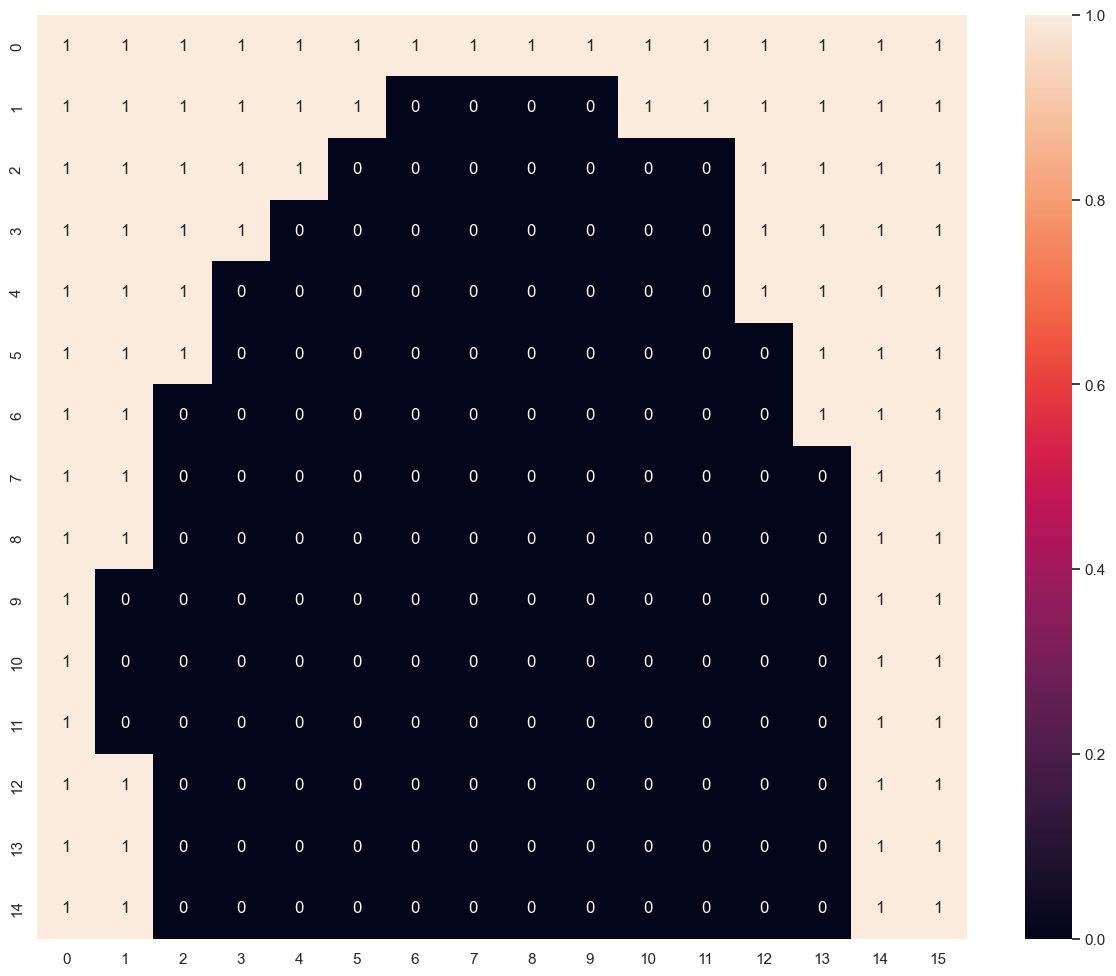

In [179]:
sns.heatmap(bg_matrix, annot=True)
